# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Saila Fidhi Rohmah
- **Email:** sailafidhi82@gmail.com
- **ID Dicoding:** M227D4KX1972


## Menentukan Pertanyaan Bisnis

- Pada musim apa rata-rata sepeda paling banyak disewakan?
- Bagaimana pengaruh cuaca terhadap siklus persewaan sepeda?
- Bagaimana perbedaan sewa sepeda pertahun di hari kerja dengan selain hari kerja?
- Bagaimana performa jumlah pengguna sepeda dalam 5 bulan terakhir?





## Import Semua Packages/Library yang Digunakan

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

- Import file dari files.upload, kemudian file dipanggil dan dilihat lima data teratasnya.

In [10]:
from google.colab import files
files.upload()

Saving day.csv to day.csv


{'day.csv': b'instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt\r\n1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985\r\n2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801\r\n3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349\r\n4,2011-01-04,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562\r\n5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,82,1518,1600\r\n6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606\r\n7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510\r\n8,2011-01-08,1,0,1,0,6,0,2,0.165,0.162254,0.535833,0.266804,68,891,959\r\n9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.36195,54,768,822\r\n10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321\r\n11,2011-01-11,1,0,1,0,2,1,2,0.169091,0.191464,0.686364,0.122132,43,1220,1263\r\n12,2011-01-

In [13]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [14]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Mendeskripsikan data keseluruhan, sehingga menghasilkan nilai total, nilai rata-rata, standar deviasi, nilai minimum, nilai presentil 25%, 50%, dan 75%, dan nilai maksimum dari data keseluruhan.

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Menampilkan info tipe data dari setiap variabel dalam data.

In [17]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Menampilkan informasi data kosong atau NaN dalam data. Dihasilkan bahwa data bersih atau tidak memiliki NaN.

In [18]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Menampilkan hasil duplikasi yaitu 0, yang berarti data tidak memiliki duplikasi.

### Cleaning Data

In [19]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.set_index('dteday')
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Mengubah tipe data date yang awalnya objek menjadi tipe data yang sesuai yaitu datetime.

Data sudah bersih dan tidak terdapat duplikasi, sehingga tidak perlu dilakukan Cleaning Data

## Exploratory Data Analysis (EDA)

### Explore ...

In [20]:
day_df.describe(include="all")

<ipython-input-20-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Menampilkan deskripsi data keseluruhan disertai frequensi, nilai teratas dan terakhir, serta data statistik yaitu nilai total, nilai rata-rata, standar deviasi, nilai minimum, nilai presentil 25%, 50%, dan 75%, dan nilai maksimum.

1. Mengetahui rata-rata jumlah sepeda yang disewa di setiap musim

In [21]:
seasons = {
    1: 'Musim Semi',
    2: 'Musim Panas',
    3: 'Musim Gugur',
    4: 'Musim Dingin'
}
day_df['Musim'] = day_df['season'].map(seasons)

In [22]:
day_df.groupby('Musim')['cnt'].mean().reset_index().sort_values(by="cnt")

,Musim,cnt
3,Musim Semi,2604.132597
0,Musim Dingin,4728.162921
2,Musim Panas,4992.331522
1,Musim Gugur,5644.303191


Didapatkan rata-rata jumlah sepeda yang disewa pada Musim gugur lebih banyak daripada di musim lainnya.

2. Mengetahui rata-rata jumlah sepeda yang disewa di setiap kondisi cuaca

In [23]:
weather_condi = {
    1: 'Cerah',
    2: 'Berawan',
    3: 'Hujan Ringan',
    4: 'Hujan Lebat'
}
day_df['weather_con'] = day_df['weathersit'].map(weather_condi)

In [24]:
day_df.groupby('weather_con')['cnt'].mean().reset_index().sort_values("cnt")

,weather_con,cnt
2,Hujan Ringan,1803.285714
0,Berawan,4035.862348
1,Cerah,4876.786177


Didapatkan rata-rata jumlah sepeda yang disewa saat cuaca cerah lebih banyak daripada saat cuaca lainnya.

3. Mengetahui rata-rata jumlah sepeda yang disewa di hari kerja dan hari libur

In [25]:
days_work = {
    1: 'Hari Kerja',
    0: 'Hari Tidak Kerja'
}
day_df['day_work'] = day_df['workingday'].map(days_work)

In [26]:
day_df.groupby('day_work')['cnt'].mean().reset_index().sort_values("cnt")

,day_work,cnt
1,Hari Tidak Kerja,4330.168831
0,Hari Kerja,4584.820000


In [27]:
days_week = {
    0: 'Minggu',
    1: 'Senin',
    2: 'Selasa',
    3: 'Rabu',
    4: 'Kamis',
    5: 'Jumat',
    6: 'Sabtu'
}
day_df['day_week'] = day_df['weekday'].map(days_week)

In [28]:
day_df.groupby('day_week')['cnt'].mean().reset_index().sort_values("cnt")

,day_week,cnt
2,Minggu,4228.828571
6,Senin,4338.123810
5,Selasa,4510.663462
3,Rabu,4548.538462
4,Sabtu,4550.542857
1,Kamis,4667.259615
0,Jumat,4690.288462


Didapatkan bahwa rata-rata sepeda yang disewa saat hari kerja lebih banyak dari pada hari tidak kerja, di mana hari Jumat adalah hari spesifik terbanyaknya.

4. Mengetahui jumlah pengguna 5 bulan terakhir

In [29]:
monthly_df = day_df.resample(rule='M', on='dteday').agg({
    "casual": "sum",
    "registered": "sum"
})

# mengubah format tanggal indeks monthly_df menjadi '%Y-%m-%d'
monthly_df.index = monthly_df.index.strftime('%Y-%m-%d')

# mengubah nama kolom
monthly_df.rename(columns={
    "casual": "biasa",
    "registered": "terdaftar"
}, inplace=True)

# menampilkan lima baris pertama data bulanan
monthly_df.tail()

,biasa,terdaftar
dteday,,
2012-08-31,43197,171306
2012-09-30,43778,174795
2012-10-31,34538,164303
2012-11-30,21009,131655
2012-12-31,13245,110468


In [30]:
monthly_df.mean()

biasa         25834.041667
terdaftar    111360.916667
dtype: float64

Didapatkan hasil rata-rata pengguna sepeda terdaftar lebih banyak daripada pengguna biasa.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa rata-rata sepeda paling banyak disewakan?


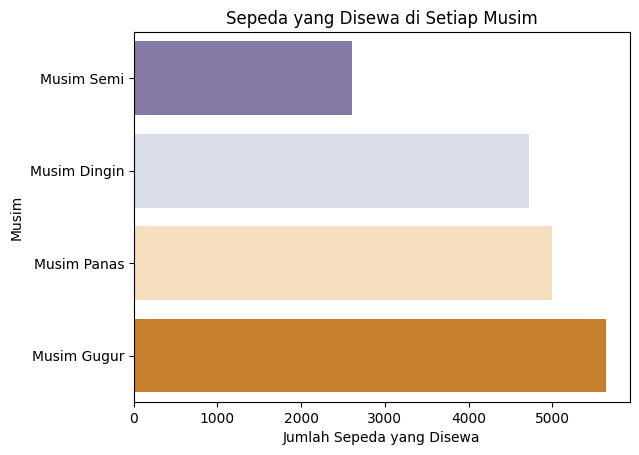

In [31]:
season = day_df.groupby('Musim')['cnt'].mean().reset_index().sort_values(by="cnt")

sns.barplot(y= 'Musim', x='cnt', data = season, palette = 'PuOr_r', hue='Musim', legend=False)
plt.xlabel("Jumlah Sepeda yang Disewa")
plt.title("Sepeda yang Disewa di Setiap Musim")
plt.show()

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap siklus persewaan sepeda?

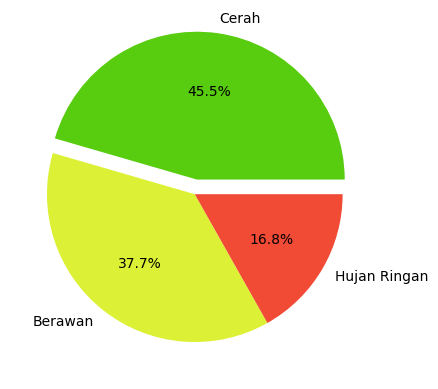

In [32]:
weather = day_df.groupby('weather_con')['cnt'].mean().reset_index().sort_values("cnt", ascending = False)

label = weather['weather_con']
value = weather['cnt']
colors = ('#58cc0e', '#dcf135', '#f14a35')
explode = (0.1, 0, 0)

plt.pie(
    x=value,
    labels=label,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)
plt.show()

### Pertanyaan 3: Bagaimana perbedaan sewa sepeda pertahun di hari kerja dengan selain hari kerja?

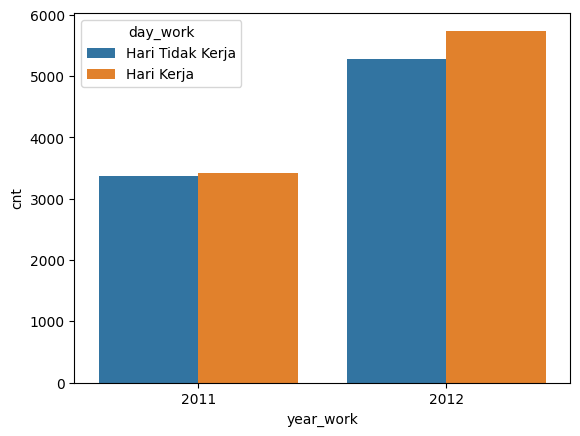

In [33]:
year_work = {
    0: '2011',
    1: '2012'
}
day_df['year_work'] = day_df['yr'].map(year_work)

sns.barplot(data=day_df, x=day_df['year_work'], y="cnt", hue=day_df['day_work'], errorbar=None)
plt.show()

### Pertanyaan 4: Bagaimana performa jumlah pengguna sepeda dalam 5 bulan terakhir?

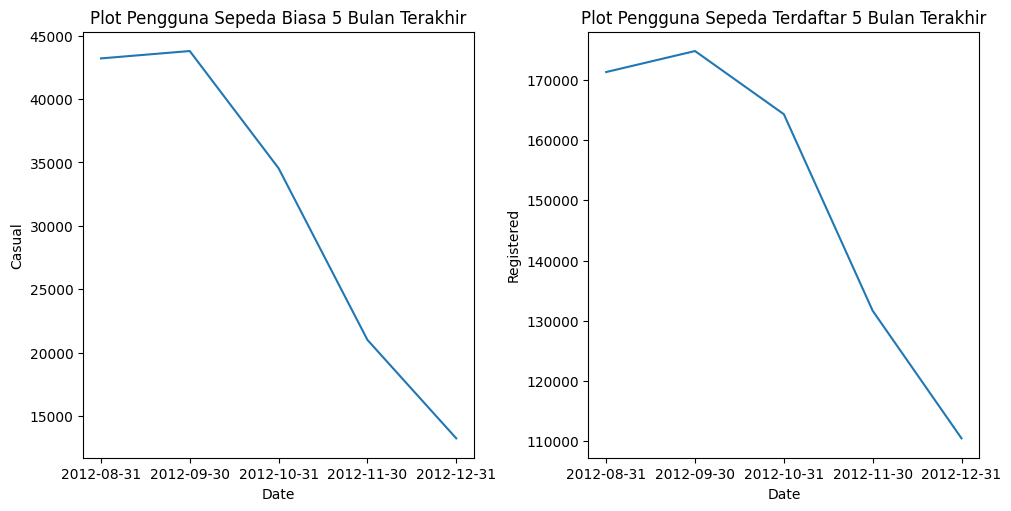

In [34]:
# menampilkan lima baris pertama data bulanan
monthly_tail = monthly_df.tail()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

#Membuat plot pengguna biasa
ax1.plot(monthly_tail.index, monthly_tail['biasa'])

ax1.set_xlabel('Date')
ax1.set_ylabel('Casual')
ax1.set_title('Plot Pengguna Sepeda Biasa 5 Bulan Terakhir')

#Membuat plot pengguna terdaftar
ax2.plot(monthly_tail.index, monthly_tail['terdaftar'])

ax2.set_xlabel('Date')
ax2.set_ylabel('Registered')
ax2.set_title('Plot Pengguna Sepeda Terdaftar 5 Bulan Terakhir')

plt.show()


- Analisis Lainnya untuk Pengguna sepeda selama 5 bulan terakhir.

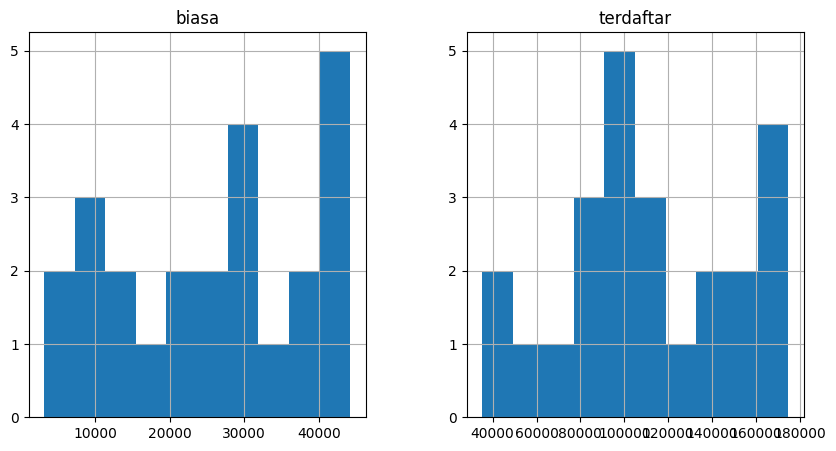

In [37]:
monthly_df.hist(figsize=(10,5))
plt.show()

In [38]:
monthly_df.describe()

,biasa,terdaftar
count,24.000000,24.000000
mean,25834.041667,111360.916667
std,13528.543135,40136.833621
min,3073.000000,35116.000000
25%,13140.250000,87474.500000
50%,27693.500000,106369.000000
75%,36953.000000,139733.500000
max,44235.000000,174795.000000


Menghasilkan data statistik dari analisis deskriptif.

- Mencari Korelasi dari data pengguna sepeda biasa dan terdaftar.

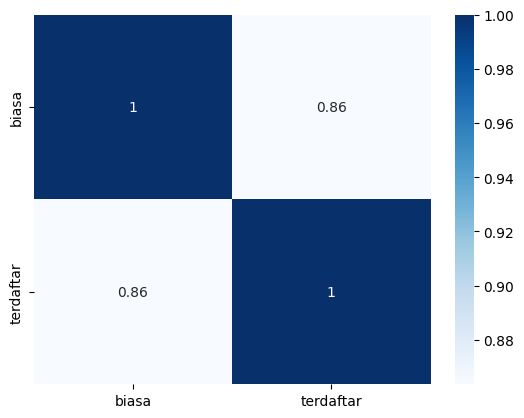

In [39]:
sns.heatmap(monthly_df.corr(), annot=True, cmap="Blues")
plt.show()

Dihasilkan keduanya memiliki korelasi dengan nilai 0.86.

## Conclusion

- Conclution pertanyaan 1

  Diketahui terdapat empat musim selama sepeda disewa, yaitu musim semi, musim dingin, musim panas, dan musim gugur. Sepeda yang paling banyak disewakan dapat dibaca dari visualisasi barplot. Barplot tersebut menunjukkan bahwa sepeda paling banyak disewa pada Musim Gugur, yaitu dengan rata-rata 5644.303191.

- Conclution pertanyaan 2

  Berdasarkan visualisasi pertanyaan ke-2, diketahui bahwa cuaca berpengaruh terhadap siklus persewaan sepeda. Seharusnya terdapat empat kategori kondisi cuaca, yaitu Cerah, Berawan, Hujan Ringan, dan Hujan Berat. Didapatkan hasil bahwa pada saat cuaca Hujan Berat tidak ada satupun sepeda yang disewa, sementara pada cuaca Cerah sepeda disewa oleh banyak pengguna. Persentase yang ditunjukkan yaitu 45,5%, sementara untuk cuaca lainnya yaitu 37,7% saat cuaca Berawan dan 16,8% untuk cuaca Hujan Ringan.

- conclution pertanyaan 3

  Berdasarkan hari kerjanya, sepeda banyak disewa pengguna ketika hari kerja dibandingkan ketika hari tidak bekerja atau hari libur. Kemungkinan yang terjadi yaitu banyaknya sepeda yang digunakan pengguna untuk bekerja. Baik pada tahun 2011 maupun 2012, hari kerja tetap menjadi pilihan untuk menyewa sepeda.

- conclution pertanyaan 4

  Sepeda yang disewa oleh pengguna terdaftar menunjukkan rata-rata jumlah lebih banyak daripada pengguna biasa, yaitu sebesar 111360,92. Tabel  pengguna biasa dan terdaftar selama lima bulan terakhir juga menunjukkan bahwa pengguna terdaftar selalu lebih unggul daripada pengguna biasa. Semenatara berdasarkan grafik, sepeda yang disewa oleh pengguna biasa dan pengguna terdaftar sama-sama mengalami penurunan sejak lima bulan terakhir pada tahun 2012. Hal ini dibuktikan dengan grafik penurunan dari plot Pengguna Biasa dan Pengguna Terdaftar.



